### POST Talebi

In [6]:
#https://www.image-charts.com
import requests

In [17]:
grafik_URL= "https://image-charts.com/chart"
#payload tipi siteden siteye değişebilir bu site bu parametreleri bu şekilde istiyor 
#mesela , yerine | kullanılmasını istediği parametreler var
payload = {
    "chs" : "190x190", #canvas size
    "chd" : "t:60,40", #oranlar sırasıyla %60,%40
    "cht" : "p3", #chart type pie (p3) chart
    "chl" : "Hello|World", #elemanlar sırasıyla Hello ve World  | (pipeline) ile ayrılır
    "chan" : None, #chart animasyonu None kapalı
    "chf" : "ps0-0,lg,45,ffeb3b,0.2,f44336,1|ps0-1,lg,45,8bc34a,0.2,009688,1" #renk seçimleri | (pipeline) ile ayrılır
}

response = requests.post(grafik_URL, data=payload ) #params= değil data= kullanılıyor

In [15]:
response.status_code

200

In [11]:
response.content #byte tipinde (b"xxx") verdi bunu görselleştirmemiz gerekiyor

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc\x00\x00\x00\xbe\x08\x06\x00\x00\x00\xd7\xed\xdca\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx^\xed\x9d\x07\x9c\\U\xd9\xff\x9f;\xb3-\x9b\xba\x9b\xdeCB\x80\x14\x08!\x10\x92\x80\x141\x80\xfa*\x08\x02RTPQ\xfe\x80"\xa0\x80\x8a\x80\x15\xb1 \xbe\xcakA}\x15\x04\x1bR_\x95\x0e\x06\x92@\x80$\x90BH#u\xd3w7\x9b\xecfw\xa7\xdc\xff\xe7\x9e;\xe5\xce\xdc\xe7\x9c{n\xd9dw\xe67\x9fO>\xce<\xe7i\xe7{F\xf8qr\xe6\x1e\xc34M\x93\xf0\x02\x01\x10\x00\x01\x10\x00\x01\x10\x00\x01\x10\x00\x81\x12%\x10+\xd1yaZ \x00\x02 \x00\x02 \x00\x02 \x00\x02  \x08T\x80\x03\x08\x80\x00\x08\x80@0\x02\xc9t\x8a\xb6\xb5\xee\xa1\xad\xfbw\xd1\x8e\xb6&jlo\xa1\xdd\x07\xf6Rc\xfb>\xda\x978@\xad\xe2O;\xedO\xb4\x8b\x02\x07\x92\x1d\xf4\xe2\xc7\x7f*\xdew\xfe\xf7\\"2\xc8\xa8\xa8!\xaa\xa8"\x8aU\x12\xd5\x0e \xea=\x88\x8c\xda:2z\xd7\x11\xf5\x1eHF\xdf\xa1d\xd4\x8f&\xa3\xff0"\x03{\x14\xc1V\nQ P\x1a\x04\xda\xdb\xdb\xe9\xc2\x0b/\xa4o~\xf3\x9bt\xc2\t\'\x1c\xd2I\xb5\xb5

In [12]:
type(response.content)

bytes

In [18]:
from PIL import Image #pillow paketi
from io import BytesIO #io input output modülü

image = Image.open(BytesIO(response.content)) #bitleri çevirip image ile okunur hale getirip image olarak açıcaz
image.show() #show yerine open da diğer compilerlarda çalışabilir ama jupyterde show çalışır

### Radar Chart

In [27]:
grafik_URL= "https://image-charts.com/chart"

payload = {
    "chco": "3092de", #color code
    "chd" : "t:81,65,50,67,59,81", #değerler
    "chl" : "hiz|sut|pas|top_surus|defans|fizik",   #değer etiketleri, x x e geri dönmesinin nedeni ...
                                                        #dairenin diğer ucu bağlanmalı yoksa eksik gösterir
    "chdl": "Falcao", #label
    "chdlp": "b",
    "chs" : "480x480", 
    "cht" : "r", #radar (r) chart 
    "chtt": "Futbolcu Özellikleri", #chart title
}

response = requests.post(grafik_URL, data=payload )
image = Image.open(BytesIO(response.content))
image.show()

### Uygulama ile "Messi mi Ronaldo mu?"

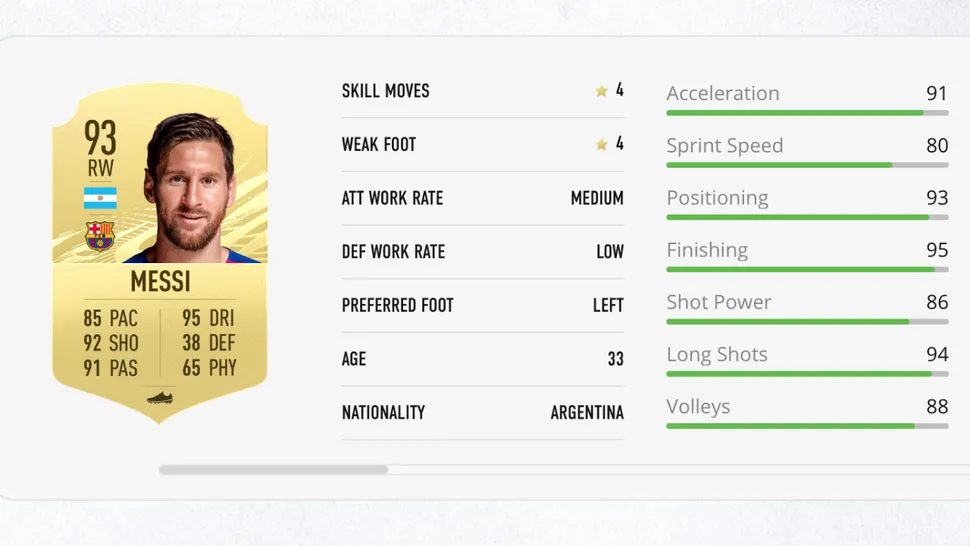

In [34]:
# https://www.gamesradar.com/fifa-21-ratings/
import requests
import IPython.display as Disp
messi_url = "https://cdn.mos.cms.futurecdn.net/r9KJrrXW3XTAFXavR8bvaC-970-80.jpg.webp"
ronaldo_url = "https://cdn.mos.cms.futurecdn.net/h93YS6AZRWjwy2hiETSEyC-970-80.jpg.webp"
Disp.Image(requests.get(messi_url).content)

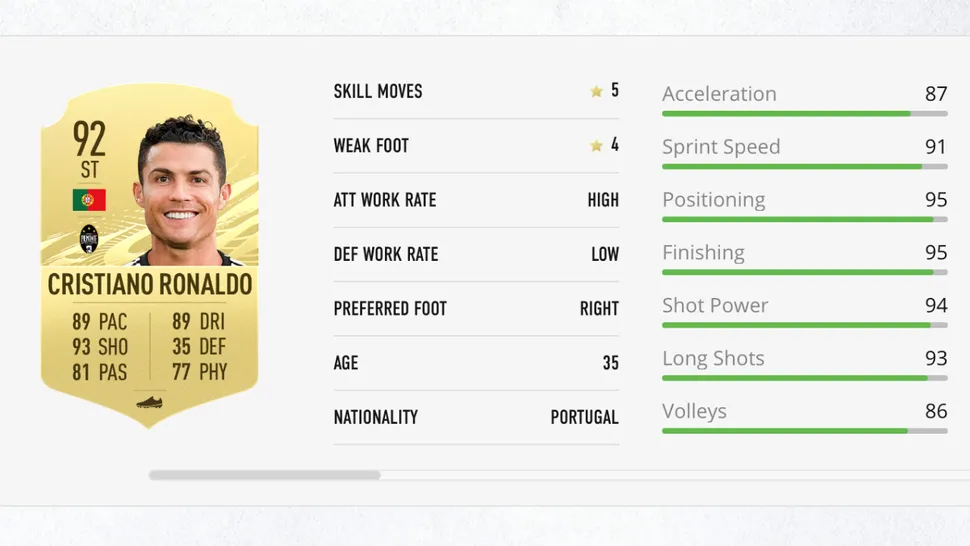

In [35]:
Disp.Image(requests.get(ronaldo_url).content)

In [53]:
import requests
from PIL import Image 
from io import BytesIO 
class Futbolcu():
    
    def __init__(self, isim, hiz, sut, pas, top_surme, defans, fizik):
        self.isim = isim
        self.hiz = hiz
        self.sut = sut
        self.pas = pas
        self.top_surme = top_surme
        self.defans = defans
        self.fizik = fizik

    def yetenek_hazirla(self): #bize reusablity kazandıracak
        return ",".join([
            str(self.hiz), #stringe çevirmezsek str beklerken int soktun diye hata veryior çünkü join str ile çalışıyor
            str(self.sut),
            str(self.pas),
            str(self.top_surme),
            str(self.defans),
            str(self.fizik),
            str(self.hiz)])

    def yetenek_gorsellestir(self):
        grafik_URL= "https://image-charts.com/chart"

        payload = { 
            "chco": "3092de", #renk
            "chd" : "t:"+self.yetenek_hazirla(), 
            "chdl": self.isim, 
            "chdlp": "b",
            "chs" : "480x480", 
            "cht" : "r", 
            "chtt": "Futbolcu Özellikleri",
            "chl" : "hiz|sut|pas|top_surus|defans|fizik", 
            "chxl" : "0:|0|20|40|60|80|100", #değer etiketlerin alacağı değerler aralığı
            "chxt": "x", #x ekseninde etiket değerlerini yazdır
            "chxr": "0,0.0,100.0", #min max değerler
            "chm": "B,AAAAAABB,0,0,0"} #alan rengi
        
        response = requests.post(grafik_URL, data=payload )
        image = Image.open(BytesIO(response.content))
        image.show()

    def yetenek_kiyasla(self, hedef_futbolcu):
        grafik_URL= "https://image-charts.com/chart"

        payload = { 
            "chco": "FF0000", #renk, iki renk de eklenebilir ama yapamadım nedense hata verdi
            "chd" : "t:"+self.yetenek_hazirla()+"|"+hedef_futbolcu.yetenek_hazirla(), 
            "chdl": self.isim+"|"+hedef_futbolcu.isim, 
            "chdlp": "b",
            "chs" : "480x480", 
            "cht" : "r", 
            "chtt": "Futbolcu Özellikleri",
            "chl" : "hiz|sut|pas|top_surus|defans|fizik", 
            "chxl" : "0:|0|20|40|60|80|100", #değer etiketlerin alacağı değerler aralığı
            "chxt": "x", #x ekseninde etiket değerlerini yazdır
            "chxr": "0,0.0,100.0", #min max değerler
            "chm": "B,AAAAAABB,0,0,0|B,0073CFBB,1,0,0" #alan rengi
        }
        response = requests.post(grafik_URL, data=payload )
        image = Image.open(BytesIO(response.content))
        image.show()        

In [54]:
messi = Futbolcu("Messi",85,92,91,95,38,65)
ronaldo = Futbolcu("Ronaldo",89,93,81,89,35,77)

In [55]:
messi.yetenek_hazirla()
ronaldo.yetenek_hazirla()

'89,93,81,89,35,77,89'

In [58]:
messi.yetenek_gorsellestir()

In [60]:
ronaldo.yetenek_gorsellestir()

In [61]:
messi.yetenek_kiyasla(ronaldo)

In [62]:
ronaldo.yetenek_kiyasla(messi)